<a href="https://colab.research.google.com/github/barrosm/BIMASTER_CODE_PUBLIC/blob/main/003_leitura_dados_diarios_cvm_parte_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Leitura de dados diários de fundos de investimentos

### Data: 13/02/2020

Mês início = 01/2017
Mês final = 02/2020 (ainda incompleto)

In [ ]:
import pandas as pd
import os as os
import matplotlib.pyplot as plt
import numpy as np

from datetime import datetime
%matplotlib inline

import seaborn as sns; 
sns.set(rc={'figure.figsize':(17,6)})
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['xtick.labelsize'] = 14
plt.rcParams['ytick.labelsize'] = 14

import os
current_dir = os.getcwd()
current_dir

from time import perf_counter
import pickle

In [ ]:
os.chdir('..')  # vai um nível para cima
current_dir = os.getcwd()
current_dir

path = current_dir + '/CVM/Diario/' #Linux
#path = current_dir + '\\CVM\\Diario\\'  #Windows

In [ ]:
# REMOTE PATH
remote_path = '/home/jupyter/Notebooks/monica/@Fund_Eval/CVM/Diario/'

In [ ]:
path

'/home/jupyter/Notebooks/CVM/Diario/'

In [ ]:
url_address = 'http://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_'

In [ ]:
ct = ['201701', '201702', '201703', '201704', '201705', '201706', '201707', '201708', '201709', '201710', '201711', '201712',
     '201801', '201802', '201803', '201804', '201805', '201806', '201807', '201808', '201809', '201810', '201811', '201812',
      '201901', '201902', '201903', '201904', '201905', '201906', '201907', '201908', '201909', '201910', '201911', '201912',
      '202001', '202002']

In [ ]:
start_month = ct[0]
end_month = ct[-1]

In [ ]:
filename = 'df_diario_'+start_month+'_'+end_month+'.pkl'

In [ ]:
arq_names = [url_address + i + '.csv' for i in ct]

In [ ]:
arq_names[-5:]

['http://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_201910.csv',
 'http://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_201911.csv',
 'http://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_201912.csv',
 'http://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_202001.csv',
 'http://dados.cvm.gov.br/dados/FI/DOC/INF_DIARIO/DADOS/inf_diario_fi_202002.csv']

In [ ]:
# Número de arquivos (meses) lidos 
len(arq_names)

38

In [ ]:
# Cria dataframe vazia
df = pd.DataFrame()

## Leitura dos arquivos e concatenação num único dataframe - o índice é o CNPJ

In [ ]:
%time
time_start = perf_counter()
df = pd.concat((pd.read_csv(f, sep = ';', index_col=0) for f in arq_names))
time_end = perf_counter()
elapsed_time = time_end - time_start

print(' **** a leitura dos dados demorou ', round(elapsed_time,2) , ' segundos *****')

CPU times: user 2 µs, sys: 1e+03 ns, total: 3 µs
Wall time: 4.53 µs
 **** a leitura dos dados demorou  271.18  segundos *****


In [ ]:
#df.head(3)
#df.tail(3)

In [ ]:
df = df.reset_index() # Do not do it until you want to group by cnpj
df.head(3)

## Salva dataframe com todos os dados diários em arquivo pkl

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11393322 entries, 0 to 11393321
Data columns (total 9 columns):
index            int64
CNPJ_FUNDO       object
DT_COMPTC        object
VL_TOTAL         float64
VL_QUOTA         float64
VL_PATRIM_LIQ    float64
CAPTC_DIA        float64
RESG_DIA         float64
NR_COTST         int64
dtypes: float64(5), int64(2), object(2)
memory usage: 782.3+ MB


In [ ]:
time_start = perf_counter()

df.to_pickle(remote_path+filename) # changed to remote path
#df.to_pickle(path+filename) 

time_end = perf_counter()
elapsed_time = time_end - time_start
print(' ****salvar df em .pkl demorou ', round(elapsed_time,2) , ' segundos *****')

 ****salvar df em .pkl demorou  2.18  segundos *****


## Cálculo do Retorno diário

In [ ]:
df["Return"] = df.groupby("CNPJ_FUNDO")["VL_QUOTA"].pct_change(1)*100.0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11393322 entries, 0 to 11393321
Data columns (total 10 columns):
index            int64
CNPJ_FUNDO       object
DT_COMPTC        object
VL_TOTAL         float64
VL_QUOTA         float64
VL_PATRIM_LIQ    float64
CAPTC_DIA        float64
RESG_DIA         float64
NR_COTST         int64
Return           float64
dtypes: float64(6), int64(2), object(2)
memory usage: 869.2+ MB


In [ ]:
# se deu encrenca e o kernel morreu, reler df = pd.read_pickle(path+filename)

In [ ]:
time_start = perf_counter()

df.to_pickle(remote_path+filename) # changed to remote path
#df.to_pickle(path+filename) 

time_end = perf_counter()
elapsed_time = time_end - time_start
print(' ****salvar df em .pkl demorou ', round(elapsed_time,2) , ' segundos *****')

 ****salvar df em .pkl demorou  7.77  segundos *****


In [ ]:
df[['DT_COMPTC', 'VL_QUOTA', 'Return']][df['CNPJ_FUNDO']=='97.929.213/0001-34']

,DT_COMPTC,VL_QUOTA,Return
290109,2017-01-02,7.396478,NaN
290110,2017-01-03,7.403134,0.089997
290111,2017-01-04,7.384956,-0.245546
290112,2017-01-05,7.374894,-0.136255
290113,2017-01-06,7.376661,0.023969
...,...,...,...
11393317,2020-02-05,8.728722,0.165302
11393318,2020-02-06,8.710002,-0.214458
11393319,2020-02-07,8.682111,-0.320225
11393320,2020-02-10,8.667109,-0.172786


In [ ]:
# Example - return of a randomly chosen fund

#numpy.random.randint(low, high=None, size=None, dtype='l')
random_row = np.random.randint(0,len(df))
random_cnpj = df['CNPJ_FUNDO'].iloc[random_row,]
random_cnpj

'17.373.839/0001-78'

In [ ]:
df_to_plot = df[['CNPJ_FUNDO','DT_COMPTC','Return']].copy()


In [ ]:
df_to_plot.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11393322 entries, 0 to 11393321
Data columns (total 3 columns):
CNPJ_FUNDO    object
DT_COMPTC     object
Return        float64
dtypes: float64(1), object(2)
memory usage: 260.8+ MB


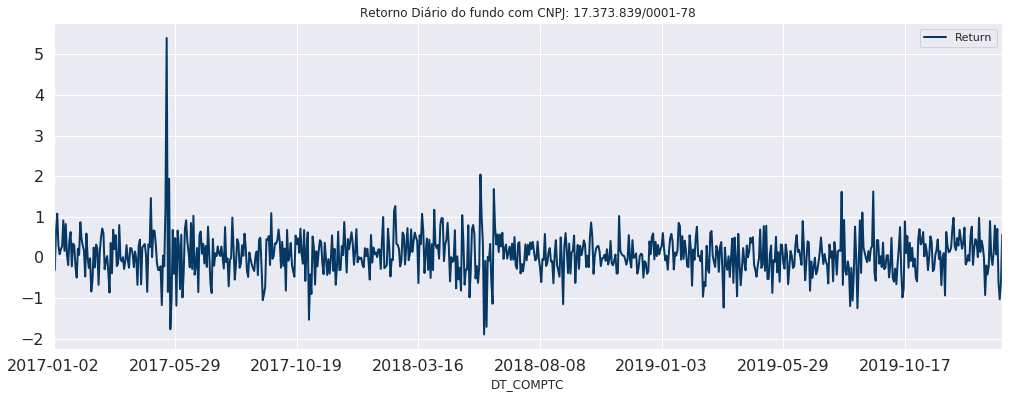

In [ ]:
sns.set(rc={'figure.figsize':(17,6)})
df_to_plot[['DT_COMPTC','Return']][df_to_plot['CNPJ_FUNDO']==random_cnpj].set_index('DT_COMPTC').plot(title = 'Retorno Diário do fundo com CNPJ: '+random_cnpj,
                                                                                                     fontsize = 16, linewidth = 2.0, color = '#073763');

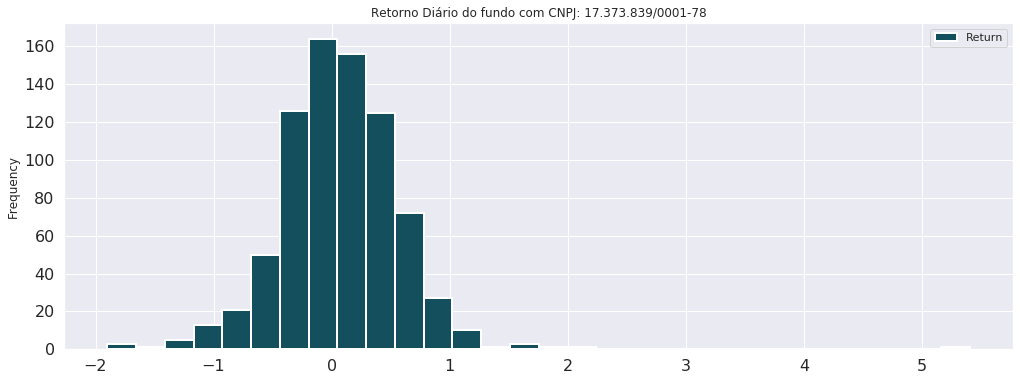

In [ ]:
sns.set(rc={'figure.figsize':(17,6)})
df[['Return']][df['CNPJ_FUNDO']==random_cnpj].plot.hist(bins = 30, title = 'Retorno Diário do fundo com CNPJ: '+random_cnpj,
                                                        fontsize = 16, linewidth = 2.0, color = '#134f5c')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11393322 entries, 0 to 11393321
Data columns (total 10 columns):
index            int64
CNPJ_FUNDO       object
DT_COMPTC        object
VL_TOTAL         float64
VL_QUOTA         float64
VL_PATRIM_LIQ    float64
CAPTC_DIA        float64
RESG_DIA         float64
NR_COTST         int64
Return           float64
dtypes: float64(6), int64(2), object(2)
memory usage: 869.2+ MB


In [ ]:
# Show days where return below 1% for randomly selected fund

df[['DT_COMPTC','Return']][(df['CNPJ_FUNDO']==random_cnpj )& (df['Return'] < -1)].set_index('DT_COMPTC')

,Return
DT_COMPTC,
2017-05-12,-1.177259
2017-05-23,-1.771749
2017-05-24,-1.040613
2017-05-30,-1.190908
2017-09-08,-1.055669
2017-11-03,-1.537210
2018-06-05,-1.899915
2018-06-07,-1.712249
2018-06-14,-1.143568


## Salva dataframe incluindo retornos diários em arquivo csv

In [ ]:
time_start = perf_counter()
df2.to_csv('df_diario_'+str(ct[0])+'_'+str(ct[-1])+'.csv',sep = ';' ,encoding='utf-8')#, compression = 'zip')

time_end = perf_counter()
elapsed_time = time_end - time_start
print(' ****salvar df em .csv demorou ', round(elapsed_time,2) , ' segundos *****')